In [88]:
#https://d2l.ai/chapter_linear-networks/linear-regression.html
import torch
import matplotlib.pyplot as plt
def synthetic_data(w, b, num_examples):  
    
    X = torch.normal(0, 1, (num_examples, len(w)))
    print(X)
    y = torch.matmul(X, w) + b
    
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2,-5.12])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

tensor([[ 0.2555, -0.3121],
        [-2.0669,  1.3310],
        [-0.0072, -0.4222],
        ...,
        [ 0.6251,  0.8759],
        [ 1.1458,  0.4670],
        [-0.2060, -1.2622]])


In [89]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.2555, -0.3121]) 
label: tensor([6.3122])


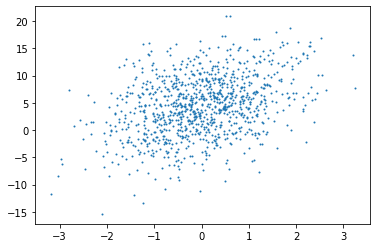

In [90]:
plt.scatter(features[:, 0].detach().numpy(),
                labels.detach().numpy(),1)

In [115]:
# iterator:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

# initialize parameters
w = torch.normal(0, 1, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# define the model:
def linearRegression(X,w,b):
    return torch.matmul(X,w) + b
# loss function:
def squaredLoss(y_hat, true_y):
    return (y_hat - true_y.reshape(y_hat.shape))**2/2


def sgd(param , lr , batch_size):
    with torch.no_grad():
        for param in param:
            param -= lr*param.grad / batch_size
            param.grad.zero_()

In [116]:
# training
import random
lr = 0.03
num_epochs = 3
net = linearRegression
loss = squaredLoss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
   

    

epoch 1, loss 0.029681
epoch 2, loss 0.000103
epoch 3, loss 0.000051


In [117]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-2.8968e-04, -9.6321e-05], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0004], grad_fn=<RsubBackward1>)


tensor([4.1996], requires_grad=True)